# AKIGORA

In [56]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

## Traitement des données

In [60]:
DFexp0 = pd.read_excel('Indicateurs_a_envoyer_aux_etudiants_Simplon.xlsx', sheet_name = 'Collection Experts')

In [59]:
DFexp0['createdAt'].info() , DFexp0['linkedInImport'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2455 entries, 0 to 2454
Series name: createdAt
Non-Null Count  Dtype 
--------------  ----- 
2455 non-null   object
dtypes: object(1)
memory usage: 19.3+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2455 entries, 0 to 2454
Series name: linkedInImport
Non-Null Count  Dtype  
--------------  -----  
505 non-null    float64
dtypes: float64(1)
memory usage: 19.3 KB


(None, None)

In [49]:
DFexp1 = DFexp0
DFexp1['updatedAt'] = pd.to_datetime(DFexp1['updatedAt'], unit='ms') #changement de type int a date
DFexp1['createdAt'] = pd.to_datetime(DFexp1['createdAt'], format='%d/%m/%Y', errors='coerce') # changement du format
DFexp1['linkedInImport'] = DFexp1['linkedInImport'].fillna(0).astype(bool) #NaN = 0, changement de float a Booleen

In [5]:
DFexp1['createdAt'].info() , DFexp1['linkedInImport'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2455 entries, 0 to 2454
Series name: createdAt
Non-Null Count  Dtype         
--------------  -----         
2220 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 19.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 2455 entries, 0 to 2454
Series name: linkedInImport
Non-Null Count  Dtype
--------------  -----
2455 non-null   bool 
dtypes: bool(1)
memory usage: 2.5 KB


(None, None)

In [6]:
seuil_non_nullite = int(0.85 * len(DFexp0))
DFexp2 = DFexp1
DFexp2 = DFexp2.dropna(axis=1, thresh=seuil_non_nullite)
DFexp2.shape , DFexp1.shape

((2455, 11), (2455, 28))

In [46]:
start_date = DFexp2['createdAt'].min()
end_date = DFexp2['createdAt'].max()
DFexp1

,_id,type,userId,createdAt,updatedAt,domains,sectors,studyLevel,studyTitle,location,...,experiences,references,visible,percentage,linkedInImport,experienceTime,done,temporarilyInvisible,isFake,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-11-01,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,Autre,NaN,NaN,NaN,...,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,25.0,False,NaN,NaN,NaN,NaN,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01 16:41:00.078,NaN,NaN,NaN,NaN,Bordeaux,...,"[{""company"":""Akigora.com"",""job"":""Développeur w...","[{""name"":"""",""company_name"":"""",""company_functio...",0.0,0.0,True,NaN,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01 10:34:32.307,Informatique / Télécoms,Informatique et Cybersécurité,Bac5,Ingénieur,Toulouse,...,"[{""date"":612396000000,""dateEnd"":1688421600000,...","[{""name"":""Gardeur, Sylvain"",""company_name"":""Ai...",1.0,100.0,True,+ de 25 ans,NaN,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,Marketing et communication,Bac5,MBA de marketing,Saint-Étienne,...,"[{""date"":1172703600000,""dateEnd"":1565820000000...","[{""name"":""Verrier Béatrice"",""company_name"":""IC...",1.0,100.0,False,+ de 25 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27 14:23:54.005,Services aux entreprises,NaN,NaN,NaN,Bordeaux,...,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",NaN,1.0,55.0,False,NaN,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,NaN,NaN,NaN,Libourne,...,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",NaN,1.0,55.0,False,NaN,1.0,1.0,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15 08:50:42.806,Industrie,Direction et Administration,Bac8,"Thèse, habilitation à diriger des recherches, ...",Bordeaux,...,"[{""date"":1483225200000,""dateEnd"":1546297200000...","[{""name"":""Anne Boisseau"",""company_name"":""GEMA""...",1.0,100.0,False,+ de 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12 07:48:00.180,Commerce / Négoce / Distribution,Direction et Administration,NaN,NaN,Bordeaux,...,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",NaN,1.0,100.0,False,20 à 30 ans,1.0,NaN,NaN,"{""localized"":true,""localizationSuccess"":true,""..."


## Département RH
### Nombre d'expert inscrit sur la plateforme

In [8]:
#Le nombre d'inscrit sur la plateforme est tout simplement le nombre de lignes que compose le dataframe soit.
Nb_experts = DFexp1.shape[0]
Nb_experts

2455

### Nombre d'experts visible sur la plateforme

In [9]:
DFexp1['visible'].astype(bool)

0       False
1       False
2        True
3        True
4        True
        ...  
2450     True
2451     True
2452     True
2453     True
2454     True
Name: visible, Length: 2455, dtype: bool

In [10]:
nb_visible = sum(DFexp0['visible']==1.0)
nb_visible

1789

Le nombre d'expert visible sur la plateforme est de 1789, cependant il y a dans le lot des experts temporairement invisible

In [11]:
nb_tempo_invisible = sum(DFexp1['temporarilyInvisible']==1.0)
nb_tempo_invisible, (nb_visible - nb_tempo_invisible)

(101, 1688)

### Profil d'experts à profil complété à 100% 

In [12]:
profil_remplis = sum(DFexp1['percentage']==100) / 2455
prct_profil_remplis = round(profil_remplis * 100, 2)
prct_profil_remplis

62.36

### pourcentage d'experts à profil incomplet 

In [13]:
profil_incomplet = sum(DFexp1['percentage'] !=100)
profil_incomplet

924

### Quel est le pourcentage d'experts par domaine d'intervention 

In [14]:
Domains = DFexp1['domains'].unique()
Domains

array(['Enseignement / Recherche / Formation', nan,
       'Informatique / Télécoms', 'Commerce / Négoce / Distribution',
       'Études et conseils', 'Industrie',
       'Métallurgie / Travail du métal', 'Management',
       'Édition / Communication / Information',
       'Hôtellerie / Restauration / Tourisme', 'Services aux entreprises',
       'Transports / Logistique', 'Agroalimentaire / Agriculture',
       'Électronique / Électricité', 'Énergies / Environnement',
       'Architecture / Paysage / Urbanisme', 'Banque / Assurance',
       'Arts / Artisanat / Culture', 'Textile / Habillement / Chaussure',
       'Armée / Sécurité', 'Santé / Social / Sport et loisirs',
       'Chimie / Parachimie / Pharmacie', 'Conseils/services',
       'BTP - Immobilier', 'BTP / Construction', 'Plastique / Caoutchouc',
       'Traduction / Interprétariat', 'Bois / Papier / Carton',
       'Machines et équipements / Automobile',
       'Commerce, Négoce, Distribution'], dtype=object)

In [15]:
Domains_grouped = DFexp1.groupby('domains').size()
Domains_grouped_sorted = Domains_grouped.sort_values(ascending=False)
Domains_grouped_sorted
#Voila la liste des domaines couvert par les experts et le nombre d'expert dans chacuns des domaines

domains
Enseignement / Recherche / Formation     346
Informatique / Télécoms                  299
Commerce / Négoce / Distribution         266
Services aux entreprises                 255
Études et conseils                       165
Édition / Communication / Information    155
Industrie                                112
Santé / Social / Sport et loisirs         63
Banque / Assurance                        62
Agroalimentaire / Agriculture             58
Hôtellerie / Restauration / Tourisme      57
Énergies / Environnement                  48
Management                                40
Transports / Logistique                   33
BTP / Construction                        33
Arts / Artisanat / Culture                28
Chimie / Parachimie / Pharmacie           24
Textile / Habillement / Chaussure         18
Machines et équipements / Automobile      14
Architecture / Paysage / Urbanisme        13
Conseils/services                          8
Électronique / Électricité                 8
Ar

**On va mettre ca sous forme de % pour mieux visualiser**


In [16]:
Domains_prct = round((DFexp1['domains'].dropna().value_counts(normalize=True)*100), 2)
Domains_prct

domains
Enseignement / Recherche / Formation     16.22
Informatique / Télécoms                  14.02
Commerce / Négoce / Distribution         12.47
Services aux entreprises                 11.95
Études et conseils                        7.74
Édition / Communication / Information     7.27
Industrie                                 5.25
Santé / Social / Sport et loisirs         2.95
Banque / Assurance                        2.91
Agroalimentaire / Agriculture             2.72
Hôtellerie / Restauration / Tourisme      2.67
Énergies / Environnement                  2.25
Management                                1.88
Transports / Logistique                   1.55
BTP / Construction                        1.55
Arts / Artisanat / Culture                1.31
Chimie / Parachimie / Pharmacie           1.13
Textile / Habillement / Chaussure         0.84
Machines et équipements / Automobile      0.66
Architecture / Paysage / Urbanisme        0.61
Conseils/services                         0.38
Élect

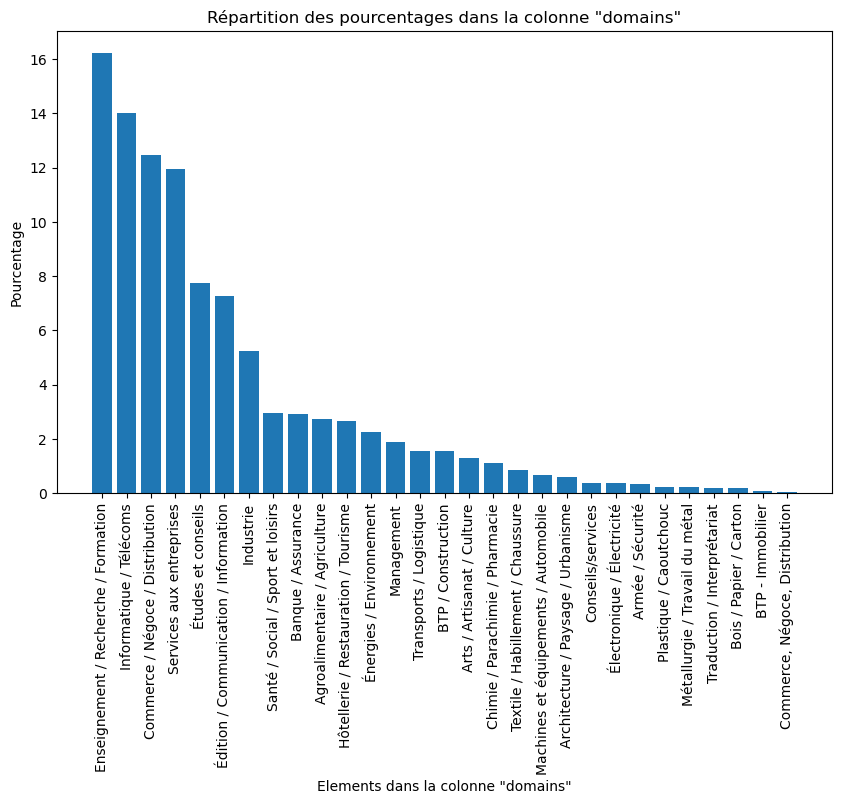

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(Domains_prct.index, Domains_prct)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains"')
plt.xticks(rotation=90)

plt.show()

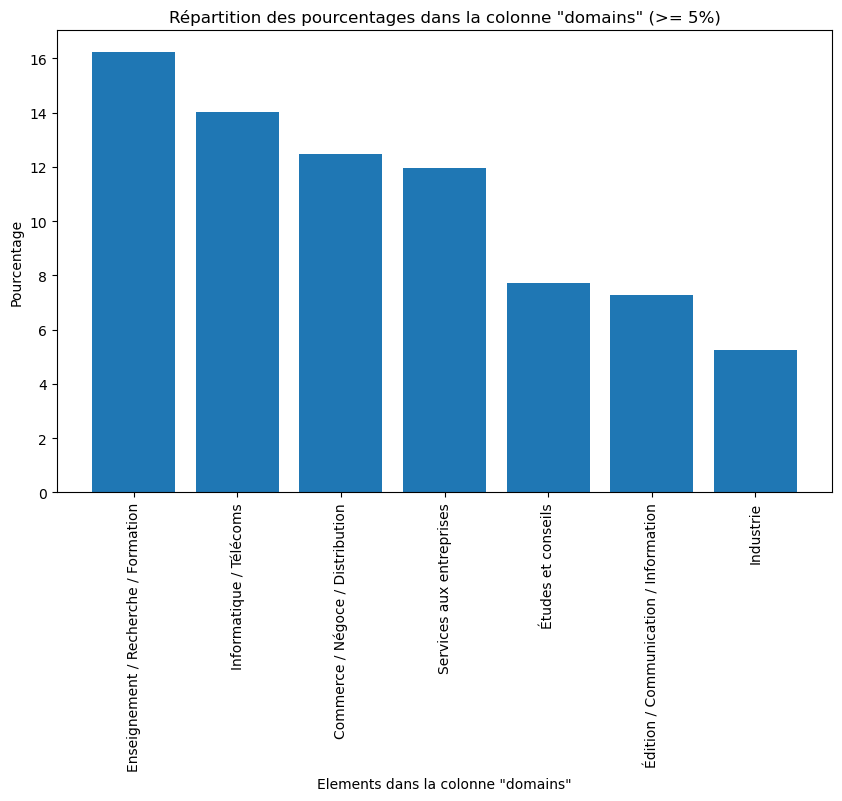

In [18]:
Domains_prct_filtre = Domains_prct[Domains_prct >= 5]

plt.figure(figsize=(10, 6))
plt.bar(Domains_prct_filtre.index, Domains_prct_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()

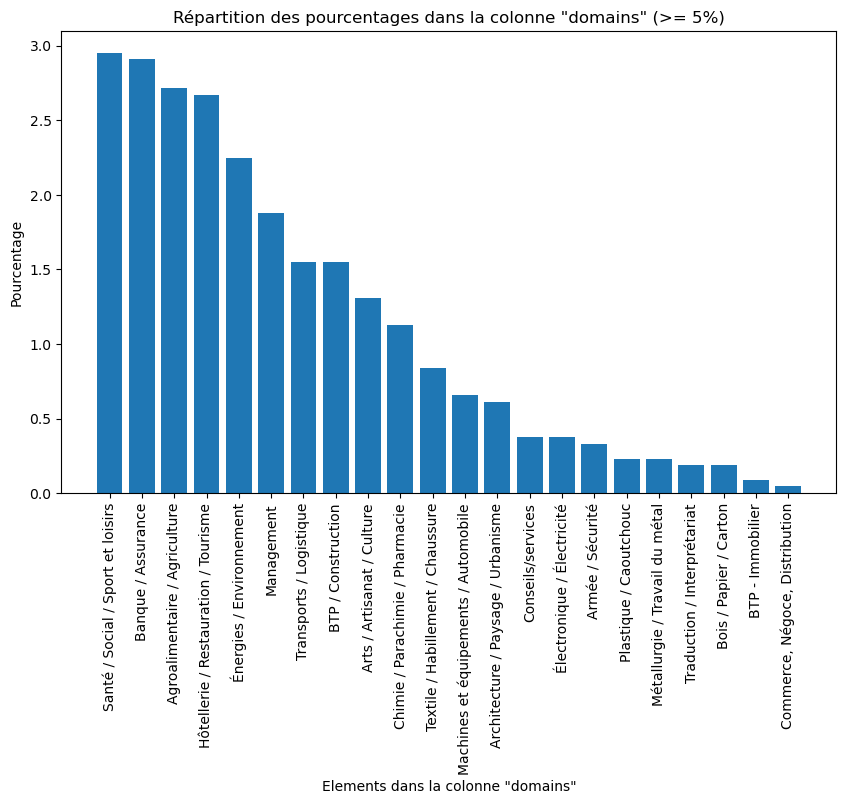

In [19]:
Domains_prct_filtre = Domains_prct[Domains_prct < 5]

plt.figure(figsize=(10, 6))
plt.bar(Domains_prct_filtre.index, Domains_prct_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()

### Pourcentage d'experts par ville 

In [20]:
Localisation = DFexp1['location'].unique()
Localisation

array([nan, 'Bordeaux et périphérie', 'Toulouse et périphérie',
       'Saint-Étienne, Loire, Lyon, paris,',
       'Lyon, Auvergne-Rhône-Alpes, France', 'France', 'Paris',
       'Bordeaux, France', 'Paris, France', 'SALLES',
       'Villefranche-sur-Saône, France', 'Nantes, France',
       'Bordeaux, Nouvelle-Aquitaine, France', 'Marseille, France',
       'BORDEAUX', 'Lyon, France', 'Auxerre', 'Ussel, France',
       'Montpellier, France', 'Paris, ile de france , occitanie',
       'Dax, Nouvelle-Aquitaine, France', 'Agen,  Bordeaux , Toulouse, ',
       'Marseille, Provence-Alpes-Côte d’Azur, France',
       'Montpellier, Occitanie, France', 'Paris et périphérie',
       'Nantes et périphérie', 'Vannes, Bretagne, France',
       'Lyon et périphérie', 'Hourtin, Nouvelle-Aquitaine, France',
       'Cuq, Occitanie, France', 'Tarbes, France', 'Bordeaux',
       'Béziers, France', 'Mérignac, Nouvelle-Aquitaine, France',
       'Lille et périphérie', 'Toulouse, Occitanie, France',
      

In [21]:
DFexp1['location'] = DFexp1['location'].str.split().str.get(0)
DFexp1['location'] = DFexp1['location'].str.replace(',','')
DFexp1['location']

0                 NaN
1            Bordeaux
2            Toulouse
3       Saint-Étienne
4                 NaN
            ...      
2450         Bordeaux
2451         Libourne
2452         Bordeaux
2453         Bordeaux
2454         Bordeaux
Name: location, Length: 2455, dtype: object

In [22]:
Ville_grouped = DFexp1.groupby('location').size()
Ville_grouped_sorted = Ville_grouped.sort_values(ascending=False)
Top_10_villes = Ville_grouped_sorted.head(10)
Top_10_villes

location
Bordeaux         976
Paris            243
Lyon             133
Toulouse          70
Nantes            59
Lille             50
Montpellier       26
Bayonne           19
Île-de-France     19
France            18
dtype: int64

In [23]:
Pourcentage_ville = round((DFexp1['location'].dropna().value_counts(normalize=True)*100), 2)
Pourcentage_ville

location
Bordeaux            47.13
Paris               11.73
Lyon                 6.42
Toulouse             3.38
Nantes               2.85
                    ...  
Saintes              0.05
Carbonne             0.05
Levallois-Perret     0.05
Seine-Maritime       0.05
france               0.05
Name: proportion, Length: 220, dtype: float64

In [24]:
pourcent_Top_10_villes = Pourcentage_ville.head(10)
pourcent_Top_10_villes

location
Bordeaux         47.13
Paris            11.73
Lyon              6.42
Toulouse          3.38
Nantes            2.85
Lille             2.41
Montpellier       1.26
Île-de-France     0.92
Bayonne           0.92
France            0.87
Name: proportion, dtype: float64

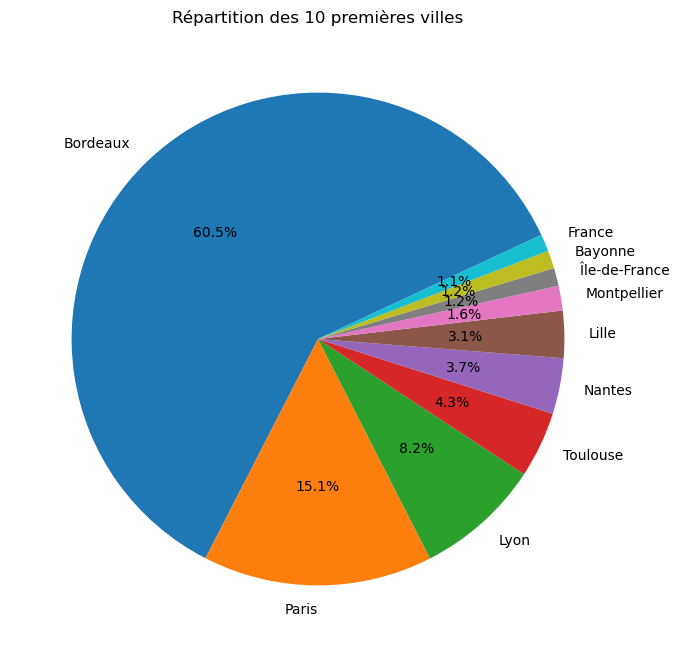

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(pourcent_Top_10_villes, labels=pourcent_Top_10_villes.index, autopct='%1.1f%%', startangle=25)
plt.title('Répartition des 10 premières villes')
plt.show()

In [26]:
DFexp3 = DFexp2
DFexp3 = DFexp3.dropna(subset=['createdAt'])
DFexp3 = DFexp3.sort_values(by='createdAt', ascending=True)
DFexp3

,_id,type,userId,createdAt,updatedAt,domains,experiences,visible,percentage,linkedInImport,geo
2454,5b5eec1198735b66d48fe3d3,expert,5b5eec1198735b66d48fe3d2,2018-07-30,2021-10-27 14:23:53.998,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Emera...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,2018-09-13,2022-05-12 07:48:00.180,Commerce / Négoce / Distribution,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2018-09-19,2022-08-15 08:50:42.806,Industrie,"[{""date"":1483225200000,""dateEnd"":1546297200000...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2018-09-20,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""..."
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2018-09-20,2021-10-27 14:23:54.005,Services aux entreprises,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""..."
...,...,...,...,...,...,...,...,...,...,...,...
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-10-30,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,False,NaN
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-10-30,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,"[{""date"":1172703600000,""dateEnd"":1565820000000...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-11-01,2023-12-01 10:34:32.307,Informatique / Télécoms,"[{""date"":612396000000,""dateEnd"":1688421600000,...",1.0,100.0,True,"{""localized"":true,""localizationSuccess"":true,""..."
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-11-01,2023-12-01 16:41:00.078,NaN,"[{""company"":""Akigora.com"",""job"":""Développeur w...",0.0,0.0,True,"{""localized"":true,""localizationSuccess"":true,""..."


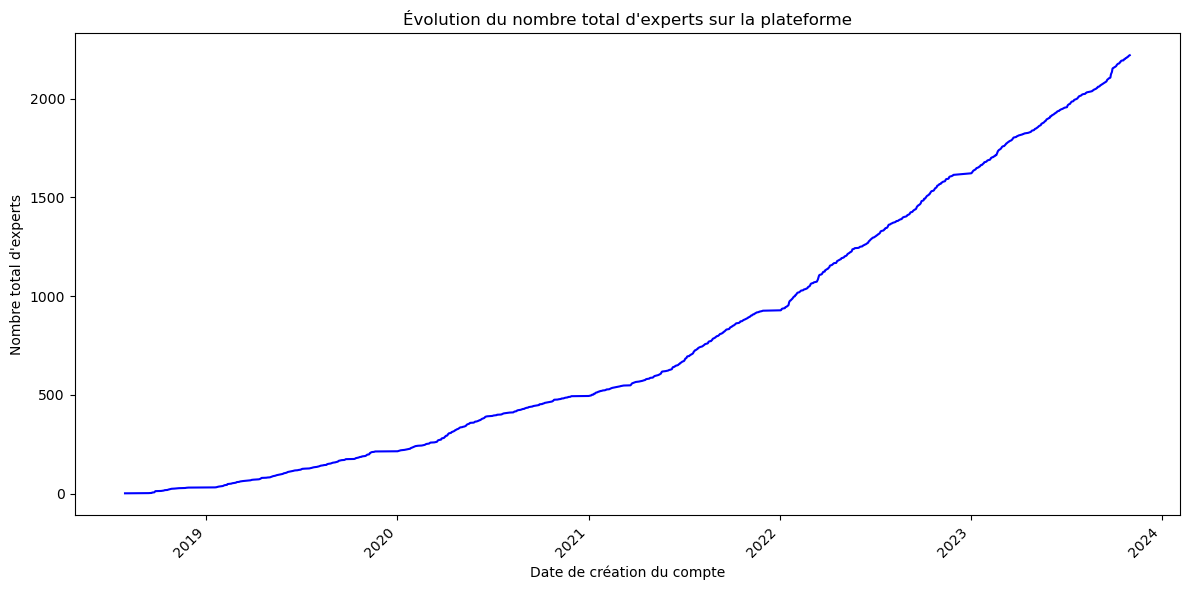

In [27]:
cumulative_counts = DFexp3['createdAt'].value_counts().sort_index().cumsum()

# Tracer la courbe en utilisant une ligne continue
plt.figure(figsize=(12, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, linestyle='-', color='b')
plt.title('Évolution du nombre total d\'experts sur la plateforme')
plt.xlabel('Date de création du compte')
plt.ylabel('Nombre total d\'experts')
plt.xticks(rotation=45, ha='right')  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()
plt.show()

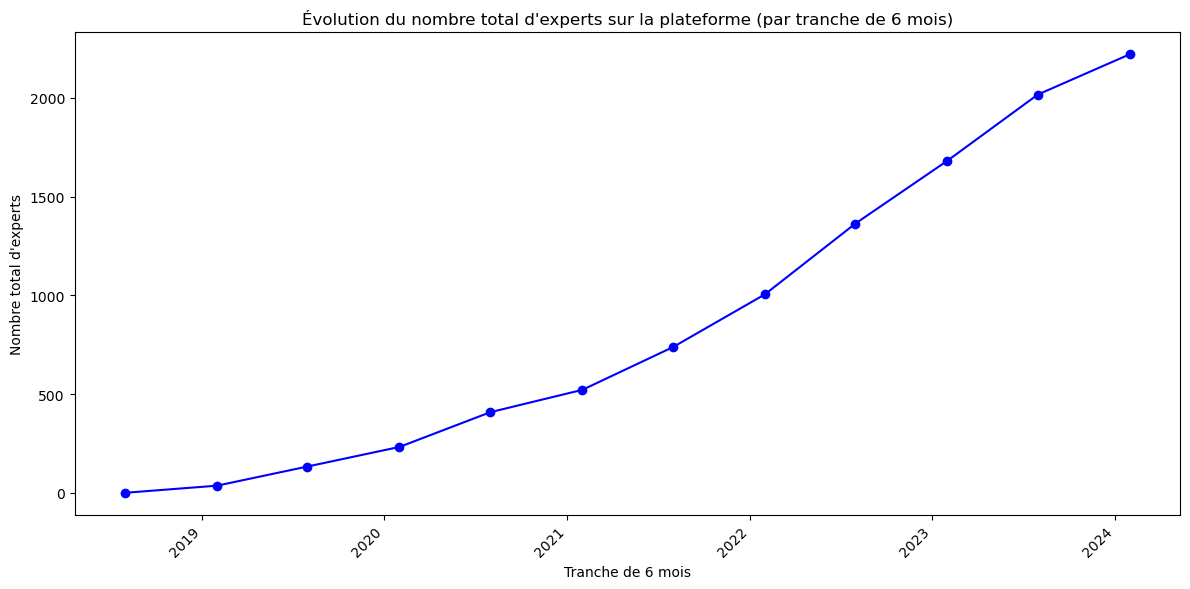

In [28]:
DFexp4 = DFexp3.copy()
DFexp4 = DFexp4.reset_index(drop=True)
DFexp4.set_index('createdAt', inplace=True)

counts_by_interval = DFexp4.groupby(pd.Grouper(freq='6M')).size()

cumulative_counts_by_interval = counts_by_interval.cumsum()

# Tracer la courbe
plt.figure(figsize=(12, 6))
plt.plot(cumulative_counts_by_interval.index, cumulative_counts_by_interval.values, linestyle='-', color='b', marker='o')
plt.title('Évolution du nombre total d\'experts sur la plateforme (par tranche de 6 mois)')
plt.xlabel('Tranche de 6 mois')
plt.ylabel('Nombre total d\'experts')
plt.xticks(rotation=45, ha='right')  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()
plt.show()

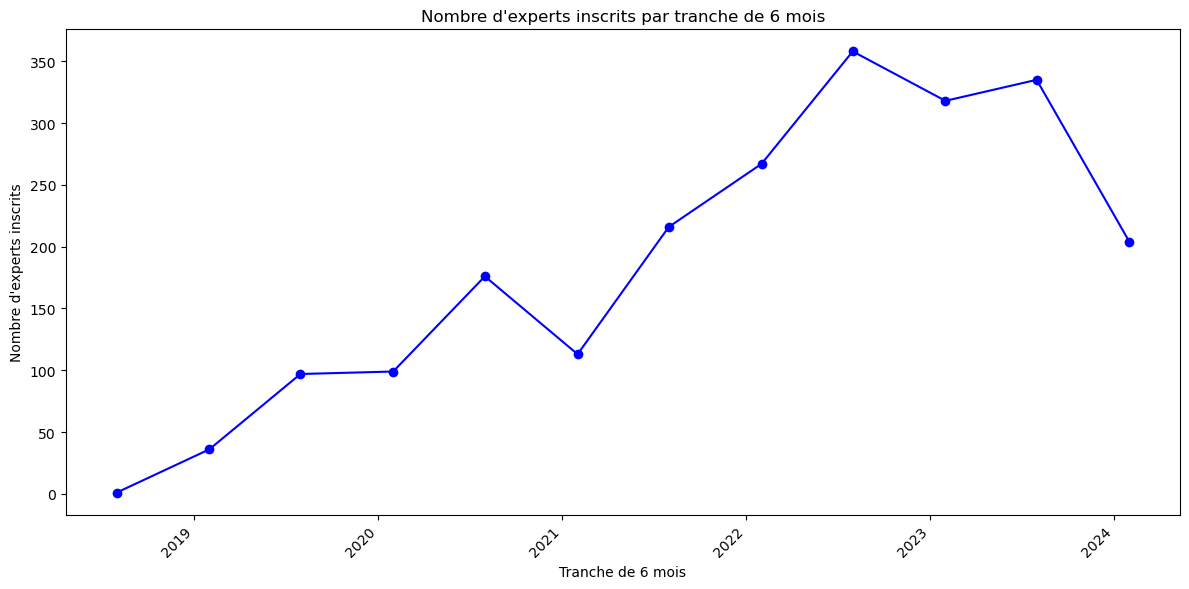

In [29]:
DFexp5 = DFexp3.copy()
DFexp5 = DFexp5.reset_index(drop=True)

# Assurez-vous que la colonne 'createdAt' est de type datetime
DFexp5['createdAt'] = pd.to_datetime(DFexp5['createdAt'])

# Calculer le nombre d'experts pour chaque tranche de 6 mois
counts_by_interval = DFexp5.groupby(pd.Grouper(key='createdAt', freq='6M')).size()

# Tracer la courbe
plt.figure(figsize=(12, 6))
plt.plot(counts_by_interval.index, counts_by_interval.values, linestyle='-', color='b', marker='o')
plt.title('Nombre d\'experts inscrits par tranche de 6 mois')
plt.xlabel('Tranche de 6 mois')
plt.ylabel('Nombre d\'experts inscrits')
plt.xticks(rotation=45, ha='right')  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()
plt.show()


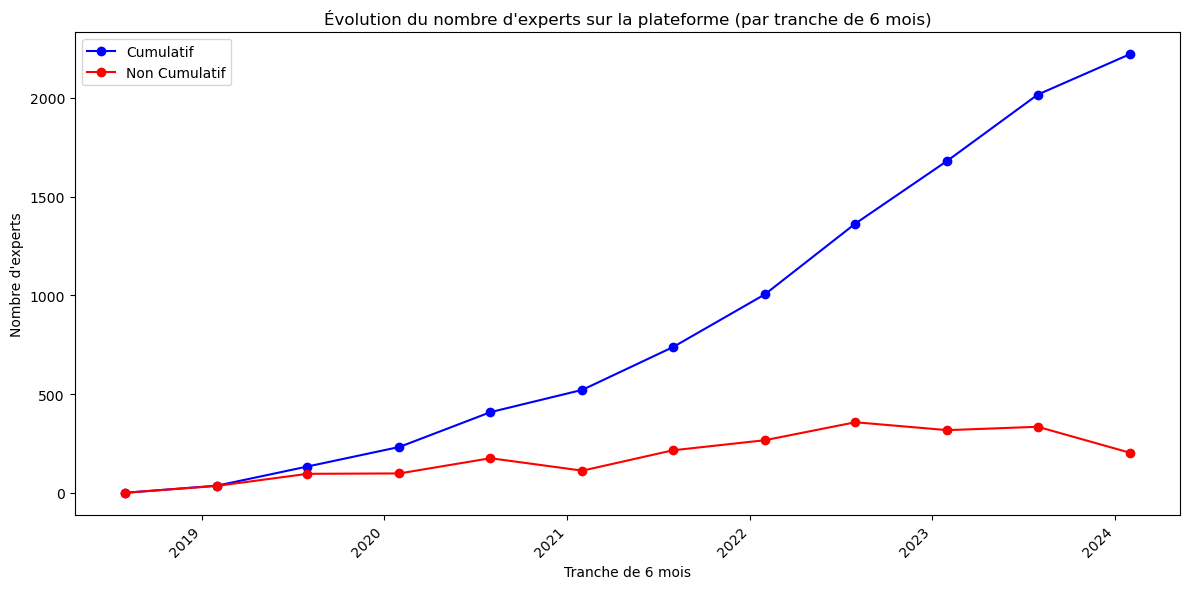

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(cumulative_counts_by_interval.index, cumulative_counts_by_interval.values, linestyle='-', color='b', marker='o', label='Cumulatif')
plt.plot(counts_by_interval.index, counts_by_interval.values, linestyle='-', color='r', marker='o', label='Non Cumulatif')

plt.title('Évolution du nombre d\'experts sur la plateforme (par tranche de 6 mois)')
plt.xlabel('Tranche de 6 mois')
plt.ylabel('Nombre d\'experts')
plt.xticks(rotation=45, ha='right')  # Rotation des dates pour une meilleure lisibilité
plt.legend()  # Ajouter une légende pour différencier les deux séries
plt.tight_layout()
plt.show()

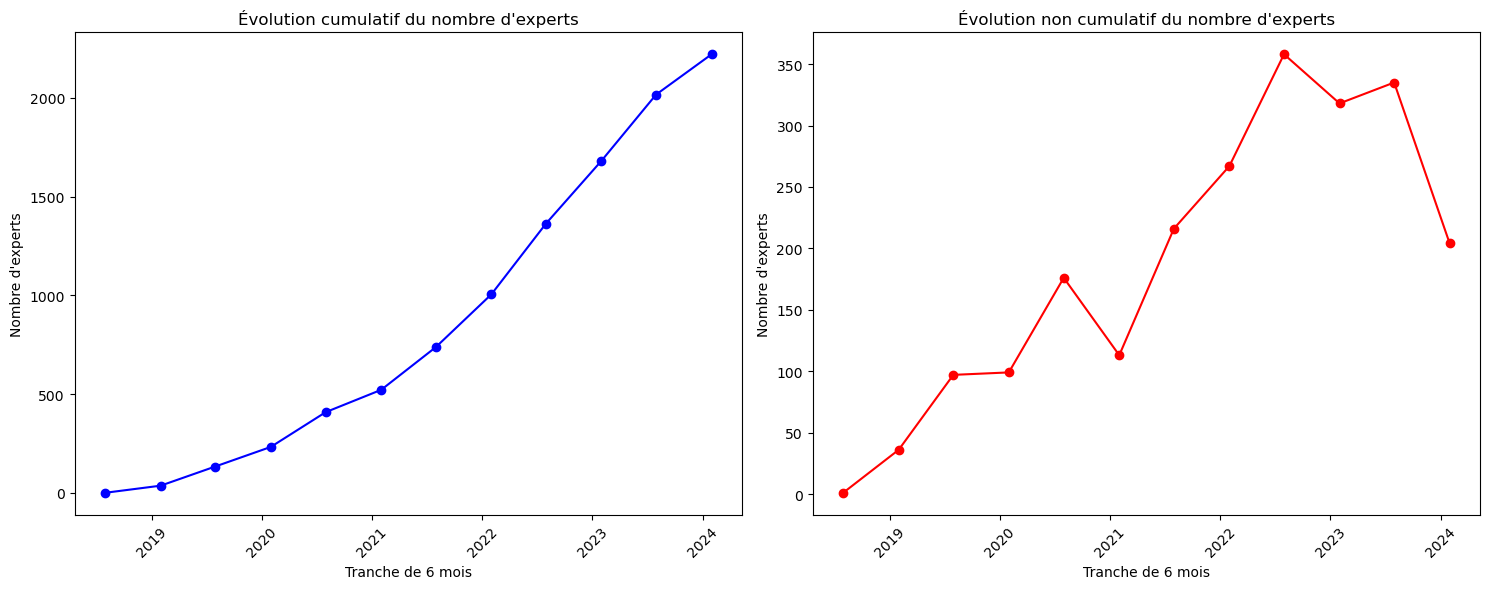

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tracer le premier graphique (cumulatif)
axs[0].plot(cumulative_counts_by_interval.index, cumulative_counts_by_interval.values, linestyle='-', color='b', marker='o')
axs[0].set_title('Évolution cumulatif du nombre d\'experts')
axs[0].set_xlabel('Tranche de 6 mois')
axs[0].set_ylabel('Nombre d\'experts')
axs[0].tick_params(axis='x', rotation=45)  # Rotation des dates pour une meilleure lisibilité

# Tracer le deuxième graphique (non cumulatif)
axs[1].plot(counts_by_interval.index, counts_by_interval.values, linestyle='-', color='r', marker='o')
axs[1].set_title('Évolution non cumulatif du nombre d\'experts')
axs[1].set_xlabel('Tranche de 6 mois')
axs[1].set_ylabel('Nombre d\'experts')
axs[1].tick_params(axis='x', rotation=45)  # Rotation des dates pour une meilleure lisibilité

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [45]:
start_date = DFexp5['createdAt'].min()
end_date = DFexp5['createdAt'].max()
start_date , end_date

(Timestamp('2018-07-30 00:00:00'), Timestamp('2023-11-01 00:00:00'))

In [50]:
DFexp2['createdAt']

0      2023-11-01
1      2023-11-01
2      2023-11-01
3      2023-10-30
4      2023-10-30
          ...    
2450   2018-09-20
2451   2018-09-20
2452   2018-09-19
2453   2018-09-13
2454   2018-07-30
Name: createdAt, Length: 2455, dtype: datetime64[ns]

In [53]:
DFexp5['createdAt'] = pd.to_datetime(DFexp5['createdAt'], format='%d/%m/%Y', errors='coerce') # changement du format
DFexp5['createdAt']

0      2018-07-30
1      2018-09-13
2      2018-09-19
3      2018-09-20
4      2018-09-20
          ...    
2215   2023-10-30
2216   2023-10-30
2217   2023-11-01
2218   2023-11-01
2219   2023-11-01
Name: createdAt, Length: 2220, dtype: datetime64[ns]